In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from scipy import stats as st 

In [2]:
data = pd.read_csv('games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
print(data.duplicated().sum())

0


In [4]:
data = data.rename(columns = str.lower)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64') 
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [7]:
print(data.isna().sum()/len(data)*100)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


In [8]:
miss_user = data['user_score'].isna()
no_user_score = data[miss_user].groupby('year_of_release').size().reset_index(name='user_miss_score')
games_per_year = data.groupby('year_of_release').size().reset_index(name='total_games')
user_score_data = games_per_year.merge(no_user_score, on='year_of_release')
user_score_data['user_percent_miss'] = (user_score_data['user_miss_score'] / user_score_data['total_games'] * 100)

miss_critic = data['critic_score'].isna()
no_critic_score = data[miss_critic].groupby('year_of_release').size().reset_index(name='critic_miss_score')
games_per_year = data.groupby('year_of_release')['name'].size().reset_index(name='total_games')
critic_score_data = games_per_year.merge(no_critic_score, on='year_of_release')
critic_score_data['critic_percent_miss'] = (critic_score_data['critic_miss_score']/critic_score_data['total_games'])*100

missing_scores = user_score_data.merge(critic_score_data, on=['year_of_release', 'total_games'])
display(missing_scores)

print(data['rating'].value_counts())

,year_of_release,total_games,user_miss_score,user_percent_miss,critic_miss_score,critic_percent_miss
0,1980,9,9,100.000000,9,100.000000
1,1981,46,46,100.000000,46,100.000000
2,1982,36,36,100.000000,36,100.000000
3,1983,17,17,100.000000,17,100.000000
4,1984,14,14,100.000000,14,100.000000
5,1985,14,13,92.857143,13,92.857143
6,1986,21,21,100.000000,21,100.000000
7,1987,16,16,100.000000,16,100.000000
8,1988,15,14,93.333333,14,93.333333
9,1989,17,17,100.000000,17,100.000000


rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64


In [9]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [10]:
game_per_year = data.groupby('year_of_release')['name'].count().reset_index(name='games_released')
print(game_per_year)

    year_of_release  games_released
0              1980               9
1              1981              46
2              1982              36
3              1983              17
4              1984              14
5              1985              14
6              1986              21
7              1987              16
8              1988              15
9              1989              17
10             1990              16
11             1991              41
12             1992              43
13             1993              60
14             1994             121
15             1995             219
16             1996             263
17             1997             289
18             1998             379
19             1999             338
20             2000             350
21             2001             482
22             2002             829
23             2003             775
24             2004             762
25             2005             939
26             2006         

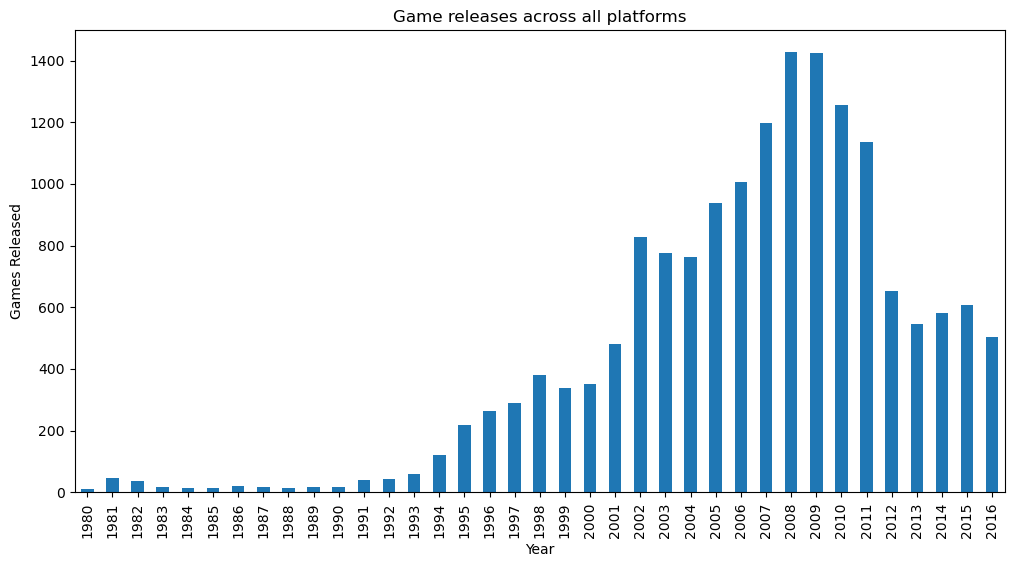

In [11]:
game_per_year.plot(kind = 'bar',
                   x= 'year_of_release',
                   title = 'Game releases across all platforms',
                   xlabel='Year',
                   ylabel='Games Released',
                   legend=False,
                   figsize=(12,6))
plt.show()

In [12]:
year_stats = data.drop(columns = ['critic_score','user_score']).groupby('year_of_release')['total_sales'].describe()
display(year_stats.T)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,9.000000,46.000000,36.000000,17.000000,14.000000,14.000000,21.000000,16.000000,15.000000,17.000000,...,1197.000000,1427.000000,1426.000000,1255.000000,1136.000000,653.000000,544.000000,581.000000,606.000000,502.000000
mean,1.264444,0.775652,0.802222,0.988235,3.596429,3.853571,1.765714,1.356250,3.147333,4.320588,...,0.505221,0.470568,0.462006,0.470223,0.446813,0.544931,0.664044,0.570620,0.442211,0.258845
std,1.383547,0.783019,1.257910,0.838825,7.200795,10.510376,1.328001,1.225174,4.414414,7.895161,...,1.215361,1.290517,1.554459,1.287804,1.140302,1.295684,1.662407,1.232507,1.099421,0.698041
min,0.230000,0.130000,0.140000,0.160000,0.270000,0.020000,0.300000,0.070000,0.030000,0.060000,...,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.340000,0.312500,0.335000,0.400000,1.130000,0.465000,1.150000,0.455000,0.970000,1.100000,...,0.050000,0.060000,0.060000,0.050000,0.060000,0.040000,0.050000,0.060000,0.030000,0.020000
50%,0.770000,0.465000,0.540000,0.770000,1.485000,1.015000,1.360000,0.885000,1.510000,1.610000,...,0.150000,0.160000,0.150000,0.140000,0.130000,0.170000,0.190000,0.160000,0.090000,0.060000
75%,1.150000,0.952500,0.780000,1.130000,2.090000,1.455000,2.200000,2.212500,3.145000,2.120000,...,0.470000,0.480000,0.400000,0.390000,0.350000,0.510000,0.592500,0.530000,0.357500,0.200000
max,4.310000,4.500000,7.810000,3.200000,28.310000,40.240000,6.500000,4.380000,17.280000,30.260000,...,22.700000,35.520000,32.770000,21.820000,14.730000,13.790000,21.050000,12.620000,14.630000,7.600000


In [13]:
plat_year_sales = data.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name='total_sales')
plat_year_sales.head(25)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


In [14]:
#Calculated the order in which platforms were released over the years. 
plat_year = data.groupby('platform')['year_of_release'].min().sort_values()
#print(plat_year)

pivot_sales = data.pivot_table(
    values='total_sales',
    index= 'year_of_release',
    columns='platform',
    aggfunc='sum',
    fill_value=0
)

#Reset pivot index to display platform release in chrono order.
#This will visually capture the 'era' and lifecycle of each platform.
pivot_reordered = pivot_sales[plat_year.index]

display(pivot_reordered)


#During initial review of this pivot table I noticed there was an outlier with respect to the DS platform.
#The code below is how I handled removing the error. Actual cleaning of the data was added to cell 35.
#ds_1985 = data[(data['platform']=='DS') & (data['year_of_release']== 1985)]
#data = data.drop(ds_1985.index)
#display(ds_1985)

platform,2600,NES,DS,PC,GB,SNES,GEN,GG,SCD,NG,...,GC,PSP,X360,PS3,Wii,3DS,PSV,WiiU,PS4,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,53.44,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,19.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,45.01,0.00,0.03,1.43,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
#From our pivot table above we can see the platforms that currently produce sales.
#Those platforms are stored in the variable below.
re_plat = ['X360','PS3','Wii','PSV','3DS','WiiU','PS4','XOne','PC']
rel_plat = data[data['platform'].isin(re_plat)]
relevent_data = rel_plat.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name='total_sales')
display(relevent_data)



first_year = data.groupby('platform')['year_of_release'].min()
last_year = data.groupby('platform')['year_of_release'].max()
life_span = (last_year - first_year)
avg_life_span = life_span.mean()
#display(first_year)
#display(last_year)
display(life_span)
print()
print()
print()
print('Average lifespan of Platform =',avg_life_span)

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
80,X360,2016,1.52
81,XOne,2013,18.96
82,XOne,2014,54.07
83,XOne,2015,60.14


platform
2600     9
3DO      1
3DS      5
DC      10
DS      28
GB      13
GBA      7
GC       6
GEN      4
GG       0
N64      6
NES     11
NG       3
PC      31
PCFX     0
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
PSV      5
SAT      5
SCD      1
SNES     9
TG16     0
WS       2
Wii     10
WiiU     4
X360    11
XB       8
XOne     3
Name: year_of_release, dtype: Int64




Average lifespan of Platform = 7.612903225806452


In [16]:
relevant_years = [2016, 2015, 2014, 2013] 
df_relevant = data[data['year_of_release'].isin(relevant_years)]
#Eliminating platforms that have no current sales from our relevant years.
df_relevant = df_relevant[~df_relevant['platform'].isin(['DS','PSP'])]
    
display(df_relevant)

# Justify your choice with data
rel_stats = df_relevant.groupby('year_of_release')['name'].count().reset_index(name='games_released')
display(rel_stats)
rel_stats['games_released'].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


,year_of_release,games_released
0,2013,482
1,2014,571
2,2015,603
3,2016,502


count      4.000000
mean     539.500000
std       56.970753
min      482.000000
25%      497.000000
50%      536.500000
75%      579.000000
max      603.000000
Name: games_released, dtype: float64

In [17]:
sales_trend = df_relevant.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name='total_sales')
display(sales_trend)

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,PC,2013,12.38
5,PC,2014,13.28
6,PC,2015,8.52
7,PC,2016,5.25
8,PS3,2013,113.25
9,PS3,2014,47.76


In [18]:
plat_sales = df_relevant.groupby('platform')[['total_sales']].sum()
display(plat_sales)

,total_sales
platform,
3DS,143.25
PC,39.43
PS3,181.43
PS4,314.14
PSV,32.99
Wii,13.66
WiiU,64.63
X360,136.80
XOne,159.32


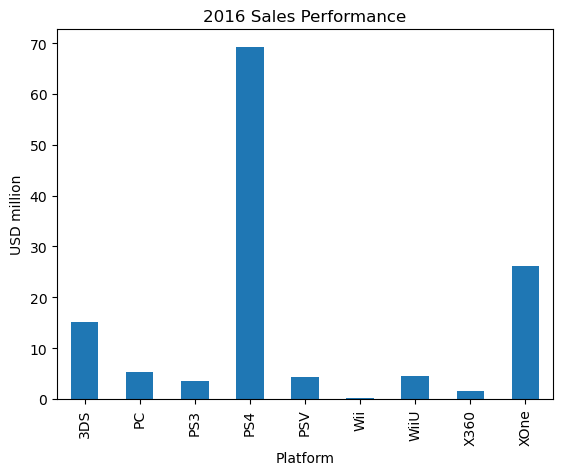

,platform,year_of_release,total_sales,pct_chang
0,3DS,2013,56.57,NaN
1,3DS,2014,43.76,-22.644511
2,3DS,2015,27.78,-36.517367
3,3DS,2016,15.14,-45.500360
4,PC,2013,12.38,NaN
5,PC,2014,13.28,7.269790
6,PC,2015,8.52,-35.843373
7,PC,2016,5.25,-38.380282
8,PS3,2013,113.25,NaN
9,PS3,2014,47.76,-57.827815


In [19]:
rec_sales = sales_trend[sales_trend['year_of_release']==2016]
#display(rec_sales)
rec_sales.plot(kind='bar',x='platform',y='total_sales',xlabel='Platform',ylabel='USD million',legend=False,title='2016 Sales Performance')
plt.show()

sales_trend['pct_chang'] = (sales_trend.groupby('platform')['total_sales'].pct_change() * 100)

display(sales_trend)

9

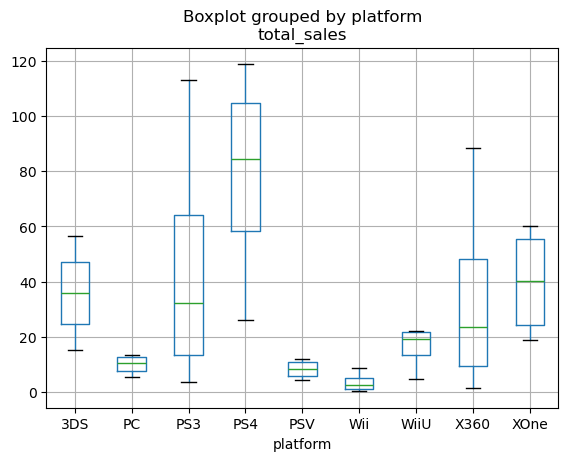

In [20]:
display(df_relevant['platform'].nunique())
sales_trend.boxplot(column='total_sales',by='platform')
plt.show()

In [21]:
sales_trend.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,4.0,35.8125,18.128338,15.14,24.6200,35.770,46.9625,56.57
PC,4.0,9.8575,3.701102,5.25,7.7025,10.450,12.6050,13.28
PS3,4.0,45.3575,48.898675,3.60,13.5150,32.290,64.1325,113.25
PS4,4.0,78.5350,40.567917,25.99,58.4350,84.625,104.7250,118.90
PSV,4.0,8.2475,3.596205,4.25,5.7500,8.420,10.9175,11.90
Wii,4.0,3.4150,3.765355,0.18,0.9000,2.445,4.9600,8.59
WiiU,4.0,16.1575,8.129507,4.60,13.4125,19.000,21.7450,22.03
X360,4.0,34.2000,38.816131,1.52,9.3500,23.350,48.2000,88.58
XOne,4.0,39.8300,20.313977,18.96,24.3525,40.110,55.5875,60.14


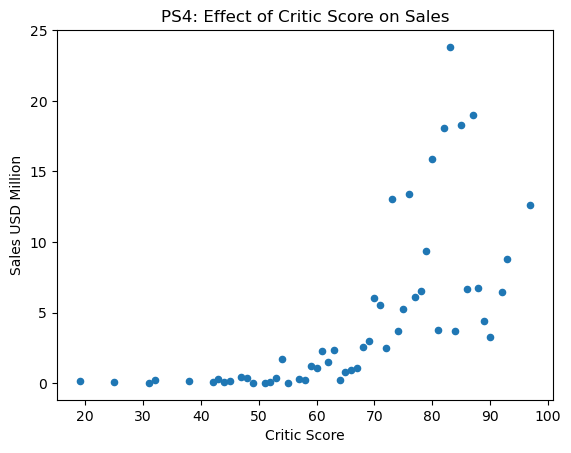

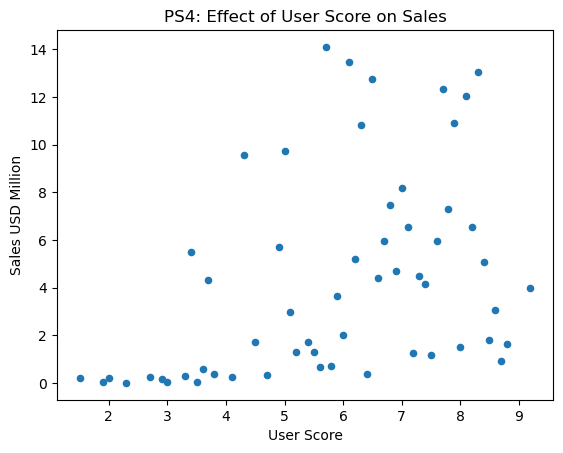

In [22]:
# Create scatter plots for both critic and user scores
ps4 = df_relevant[df_relevant['platform']=='PS4']
critic_sales = ps4.groupby('critic_score')['total_sales'].sum().reset_index(name='total_sales')
critic_sales.plot(kind='scatter',
                 x='critic_score',
                 y='total_sales',
                 xlabel='Critic Score',
                ylabel='Sales USD Million',
                title='PS4: Effect of Critic Score on Sales')
plt.show()


# User Scores
user_score_sales = ps4.groupby('user_score')['total_sales'].sum().reset_index(name='total_sales')
user_score_sales.plot(kind='scatter',
                     x='user_score',
                     y='total_sales',
                     xlabel='User Score',
                     ylabel='Sales USD Million',
                     title= 'PS4: Effect of User Score on Sales')
plt.show()

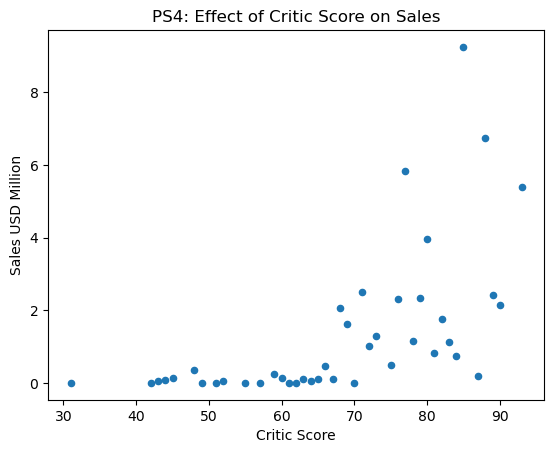

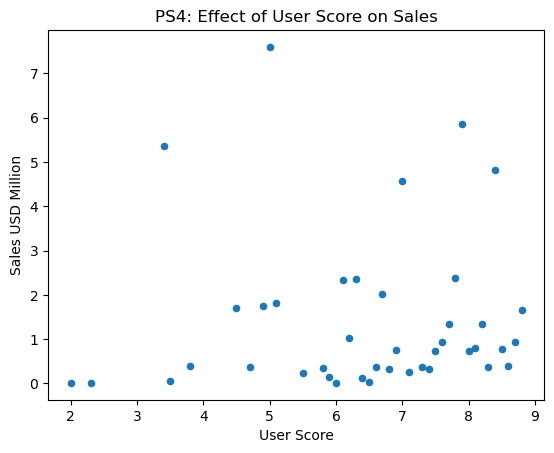

In [23]:
# Critic Scores
ps4_2016 = df_relevant[(df_relevant['platform']=='PS4') & (df_relevant['year_of_release']== 2016)]
#print(ps4_2016)



critic_sales = ps4_2016.groupby('critic_score')['total_sales'].sum().reset_index(name='total_sales')
critic_sales.plot(kind='scatter',
                 x='critic_score',
                 y='total_sales',
                 xlabel='Critic Score',
                ylabel='Sales USD Million',
                title='PS4: Effect of Critic Score on Sales')
plt.show()


# User Scores
user_score_sales = ps4_2016.groupby('user_score')['total_sales'].sum().reset_index(name='total_sales')
user_score_sales.plot(kind='scatter',
                     x='user_score',
                     y='total_sales',
                     xlabel='User Score',
                     ylabel='Sales USD Million',
                     title= 'PS4: Effect of User Score on Sales')
plt.show()




In [24]:
num_plat_rel = df_relevant.groupby('name')['platform'].count().reset_index(name='platforms_released')

multi_plat = num_plat_rel[num_plat_rel['platforms_released'] > 5]
display(multi_plat)

,name,platforms_released
25,Adventure Time: Finn & Jake Investigations,6
45,Angry Birds Star Wars,8
62,Assassin's Creed IV: Black Flag,6
134,Call of Duty: Ghosts,6
237,Disney Infinity,6
238,Disney Infinity 2.0: Marvel Super Heroes,6
324,FIFA 14,8
325,FIFA 15,8
501,Just Dance 2014,6
502,Just Dance 2015,6


In [25]:
multi_plat_6 = df_relevant[df_relevant['name'].isin(multi_plat['name'])]
display(multi_plat_6.sort_values(by='name'))
grouped_games_6 = multi_plat_6.groupby(['name','platform'])['total_sales'].sum().reset_index(name='plat_total_sales')
grouped_games_6.head(25)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13043,Adventure Time: Finn & Jake Investigations,WiiU,2015,Action,0.03,0.02,0.00,0.00,NaN,NaN,NaN,0.05
11665,Adventure Time: Finn & Jake Investigations,X360,2015,Action,0.03,0.05,0.00,0.01,NaN,NaN,NaN,0.09
11293,Adventure Time: Finn & Jake Investigations,3DS,2015,Action,0.03,0.05,0.00,0.01,NaN,NaN,NaN,0.09
11153,Adventure Time: Finn & Jake Investigations,PS3,2015,Action,0.02,0.05,0.00,0.01,NaN,NaN,NaN,0.08
10893,Adventure Time: Finn & Jake Investigations,PS4,2015,Action,0.03,0.05,0.00,0.02,NaN,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...
4368,Watch Dogs,PC,2014,Action,0.15,0.26,0.00,0.03,77.0,4.7,M,0.44
1021,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,NaN,5.1,M,1.74
1180,Watch Dogs,XOne,2014,Action,0.90,0.53,0.00,0.14,78.0,5.8,M,1.57
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


,name,platform,plat_total_sales
0,Adventure Time: Finn & Jake Investigations,3DS,0.09
1,Adventure Time: Finn & Jake Investigations,PS3,0.08
2,Adventure Time: Finn & Jake Investigations,PS4,0.10
3,Adventure Time: Finn & Jake Investigations,WiiU,0.05
4,Adventure Time: Finn & Jake Investigations,X360,0.09
5,Adventure Time: Finn & Jake Investigations,XOne,0.05
6,Angry Birds Star Wars,3DS,0.33
7,Angry Birds Star Wars,PS3,0.29
8,Angry Birds Star Wars,PS4,0.22
9,Angry Birds Star Wars,PSV,0.08


In [26]:
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().reset_index(name='total_sales')
display(genre_sales)

,genre,total_sales
0,Action,320.51
1,Adventure,22.90
2,Fighting,35.29
3,Misc,62.57
4,Platform,41.94
5,Puzzle,3.17
6,Racing,39.89
7,Role-Playing,144.86
8,Shooter,232.98
9,Simulation,21.55


In [27]:
genre_game_count = df_relevant.groupby('genre')['name'].count().reset_index(name='total_games')
display(genre_game_count)

,genre,total_games
0,Action,752
1,Adventure,211
2,Fighting,79
3,Misc,146
4,Platform,72
5,Puzzle,17
6,Racing,85
7,Role-Playing,285
8,Shooter,187
9,Simulation,61


In [28]:
genre_game_count['mkt_share_%'] = (genre_game_count['total_games'] / genre_game_count['total_games'].sum())*100
display(genre_game_count)

,genre,total_games,mkt_share_%
0,Action,752,34.847081
1,Adventure,211,9.777572
2,Fighting,79,3.660797
3,Misc,146,6.765524
4,Platform,72,3.336423
5,Puzzle,17,0.787766
6,Racing,85,3.938832
7,Role-Playing,285,13.206673
8,Shooter,187,8.665431
9,Simulation,61,2.826691


In [29]:
genre_merge = genre_sales.merge(genre_game_count,on='genre')
genre_merge['avg_sales_per_game'] = genre_merge['total_sales'] / genre_merge['total_games']
display(genre_merge.sort_values('total_sales',ascending=False))

,genre,total_sales,total_games,mkt_share_%,avg_sales_per_game
0,Action,320.51,752,34.847081,0.426210
8,Shooter,232.98,187,8.665431,1.245882
10,Sports,149.93,208,9.638554,0.720817
7,Role-Playing,144.86,285,13.206673,0.508281
3,Misc,62.57,146,6.765524,0.428562
4,Platform,41.94,72,3.336423,0.582500
6,Racing,39.89,85,3.938832,0.469294
2,Fighting,35.29,79,3.660797,0.446709
1,Adventure,22.90,211,9.777572,0.108531
9,Simulation,21.55,61,2.826691,0.353279


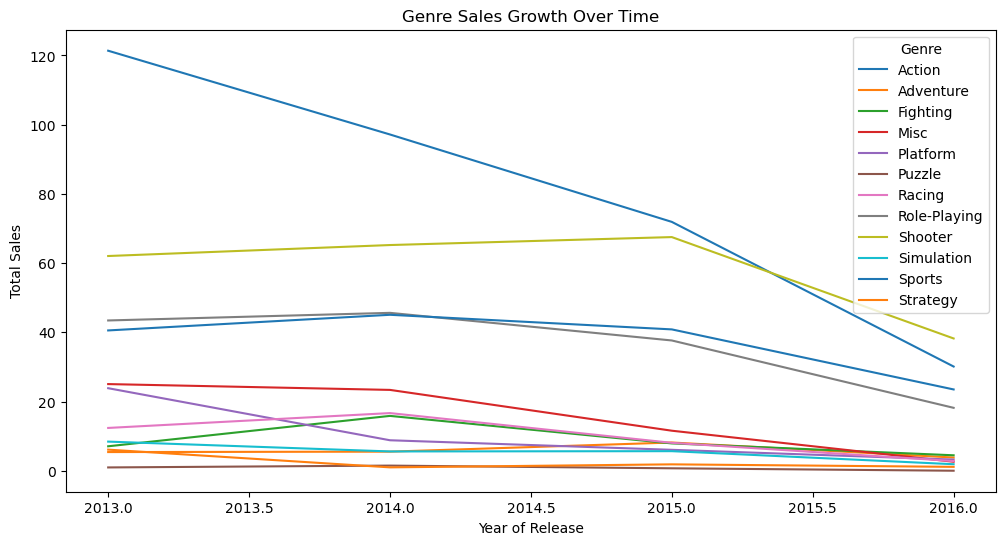

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2013,121.35,5.40,7.07,25.04,23.85,0.96,12.37,43.42,62.04,8.42,40.54,6.10
2014,97.15,5.52,15.85,23.36,8.81,1.49,16.66,45.62,65.21,5.58,45.06,0.98
2015,71.90,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


In [30]:
genre_growth = df_relevant.groupby(['year_of_release','genre'])['total_sales'].sum().reset_index(name='total_sales')

genre_pivot = genre_growth.pivot(index='year_of_release', columns='genre', values='total_sales')

genre_pivot.plot(kind='line', figsize=(12, 6))
plt.title('Genre Sales Growth Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Genre')
plt.show()
display(genre_pivot)

In [31]:
def performance (region):
    result = df_relevant.groupby('platform')[region].sum().reset_index(name='total_sales')
    return result

In [32]:
print('NA Region')
print(performance('na_sales'))
print('EU Region')
print(performance('eu_sales'))
print('JP Region')
print(performance('jp_sales'))
print('Other')
print(performance('other_sales'))

NA Region
  platform  total_sales
0      3DS        38.20
1       PC        11.11
2      PS3        63.50
3      PS4       108.74
4      PSV         5.04
5      Wii         6.56
6     WiiU        29.21
7     X360        81.66
8     XOne        93.12
EU Region
  platform  total_sales
0      3DS        30.96
1       PC        25.36
2      PS3        67.81
3      PS4       141.09
4      PSV         6.10
5      Wii         5.93
6     WiiU        19.85
7     X360        42.52
8     XOne        51.59
JP Region
  platform  total_sales
0      3DS        67.81
1       PC         0.00
2      PS3        23.35
3      PS4        15.96
4      PSV        18.59
5      Wii         0.05
6     WiiU        10.88
7     X360         0.51
8     XOne         0.34
Other
  platform  total_sales
0      3DS         6.28
1       PC         2.96
2      PS3        26.77
3      PS4        48.35
4      PSV         3.26
5      Wii         1.12
6     WiiU         4.69
7     X360        12.11
8     XOne        14.27


In [33]:
def comp_regions (regions):
    result = df_relevant.groupby('platform')[regions].sum().reset_index().plot(kind='bar',
                                                                    x='platform',
                                                                    ylabel='Sales USD Million',
                                                                    xlabel='Platform',
                                                                    title='Regional Comparison (2013-2016)'
                                                                    )
    return result

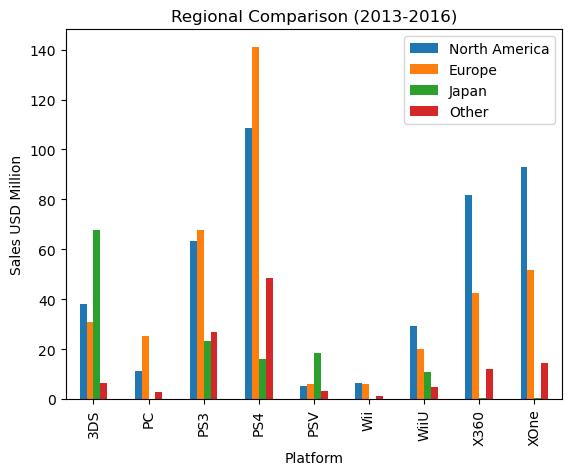

In [34]:
comp_regions(['na_sales','eu_sales','jp_sales','other_sales'])
plt.legend(['North America','Europe','Japan','Other'])
plt.show()

In [35]:
def genre_perf(genre_name, region):
    all_genres = df_relevant.groupby('genre')[region].sum().reset_index()
    result = all_genres[all_genres['genre'] == genre_name]
    return result

display(genre_perf('Action','na_sales'))

,genre,na_sales
0,Action,125.83


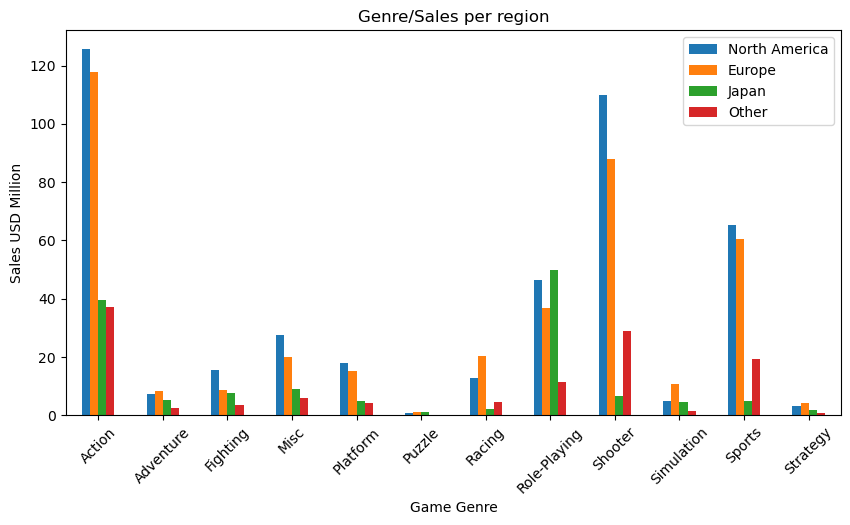

In [36]:
genres = sorted(df_relevant['genre'].unique())
#print(genres)
regions = ['na_sales','eu_sales','jp_sales','other_sales']


def genre_comp_region (genre_names,regions):
    all_genres = df_relevant.groupby('genre')[regions].sum().reset_index()
    result = all_genres[all_genres['genre']==genre_names].plot(kind='bar',
                                                               x='genre',
                                                               xlabel='Game Genre',
                                                               ylabel='Sales USD Million',
                                                               title='Genre/Sales per region',
                                                               figsize=(10,5),
                                                               rot=45
                                                              )
    return

genre_comp_region(genres,regions)
plt.legend(['North America','Europe','Japan','Other'])
plt.show()

In [37]:
def esrb_impact (rating,region):
    all_esrb = df_relevant.groupby('rating')[region].sum().reset_index()
    result = all_esrb[all_esrb['rating']==rating]
    return result

display(esrb_impact('M','na_sales'))


,rating,na_sales
2,M,165.21


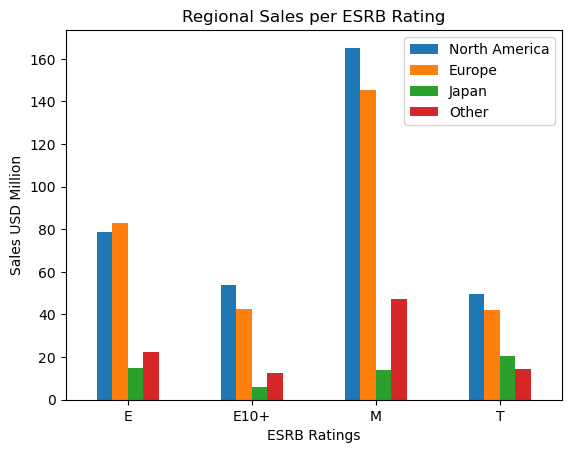

In [38]:
ratings_esrb = sorted(df_relevant['rating'].dropna().unique())
#print(ratings_esrb)



def comp_ratings (ratings,regions):
    all_ratings = df_relevant.groupby('rating')[regions].sum().reset_index()
    result = all_ratings[all_ratings['rating']== ratings].plot(kind='bar',
                                                               x='rating',
                                                               xlabel='ESRB Ratings',
                                                               ylabel='Sales USD Million',
                                                               title='Regional Sales per ESRB Rating',
                                                               rot=0
                                                            
                                                            
                                                               
                                                               
                                                     )
    return result

comp_ratings(ratings_esrb,regions)
plt.legend(['North America','Europe','Japan','Other'])
plt.show()

In [39]:
xbox_one = df_relevant[df_relevant['platform']=='XOne']
xbox_one_user = xbox_one['user_score'].dropna().astype('float64')
#xbox_one_user.head(50)
#print(xbox_one_user.isnull().sum())
#print(xbox_one_user.var())
#1.90
#print(xbox_one_user)
#xbox_one_user.dtype

pc = df_relevant[df_relevant['platform']=='PC']
pc_user = pc['user_score'].dropna().astype('float64')
#print(pc_user.isnull().sum())
#pc_user.head(50)
#print(pc_user.var())
#3.04
#pc_user.dtype

#Null Hypo: Average user ratings of Xbox one and PC platforms are equal.

alpha = 0.05

results = st.ttest_ind(xbox_one_user,pc_user,equal_var=True)

print('p-value:',results.pvalue)

if results.pvalue < alpha:
   print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.14012658403611647
We can't reject the null hypothesis


In [40]:
action = df_relevant[df_relevant['genre']=='Action']
action_user = action['user_score'].dropna().astype('float64')
#print(action_user.var())
#print(action_user.mean())
#print(len(action_user))

sports = df_relevant[df_relevant['genre']=='Sports']
sports_user = sports['user_score'].dropna().astype('float64')
#print(sports_user.var())
#print(sports_user.mean())
#print(len(sports_user))

#Null hypo: Average user score for Action and Sports games are equal.

alpha = 0.05

results = st.ttest_ind(action_user, sports_user,equal_var=True)

print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.8791962987532298e-27
We reject the null hypothesis
